<a href="https://colab.research.google.com/github/danish-khan962/Deep-Learning/blob/main/03_Neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Neural Network Classification with Tensorflow**

| Hyperparameter | Binary Classification | Multiclass Classification |
| :------------- | :-------------------- | :------------------------ |
| Input layer shape | Same as number of features (e.g. 5 for age, sex, height, weight, smoking status in heart disease prediction) | Same as binary classification |
| Hidden layer(s) | Problem specific, minimum = 1, maximum=unlimited | Same as binary classification |
| Neurons per hidden layer | Problem specific, genrally 10 to 100 | Same as binary classification |
| Output layer shape | 1(one class or the other) | 1 per class (e.g. 3 for food, person or dog photo) |
| Hidden activation | Usually `ReLU`(rectified linear unit) | Same as binary classification |
| Ouput activation | `Sigmoid` | `Softmax` |
| Loss function | `Cross entropy`(`tf.keras.losses.BinaryCrossentropy` in Tensorflow) |`Cross entropy`(`tf.keras.losses.CategoricalCrossentropy` in Tensorflow) |
| Optimizer | `SGD`(stochastic gradient descent), `Adam` | Same as binary classification |

# **Introduction to Neural networks classification with Tensorflow**

In this notebook we're going to learn how to write neural networks for classification problems. A classification is where you try to classify something as one thing or another.

A few types of classification problems:
* Binary classfication
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [1]:
import tensorflow as tf
print("Tensorflow version we're using: ", tf.__version__)

Tensorflow version we're using:  2.18.0


In [2]:
from sklearn.datasets import make_circles

# Make 100 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [3]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
# Check the labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

 Our data is a little hard to understand right now... let's visualize it

In [5]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


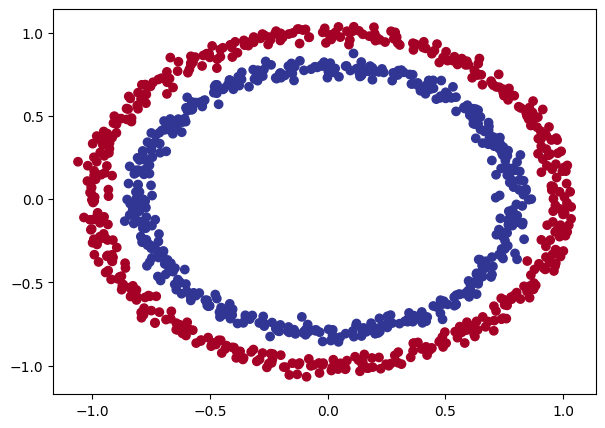

In [6]:
# Visualize with a plot
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

**[playground.tensorflow.org](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.77858&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)**

## Input and output shapes

In [7]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
# How many samples we're working with
len(X), len(y)

(1000, 1000)

In [9]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), np.int64(1))

## Steps in modelling

The steps in modelling with TensorFlow are typically:
1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak the model
6. Evaluate the model

In [10]:
# Building a neural network model for classification
tf.random.set_seed(42)  # random seed for reproducability

# 1. Create a model using Sequential API
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile(loss = tf.keras.losses.BinaryCrossentropy,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

# 3. Fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4475 - loss: 4.7293   
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4701 - loss: 0.8174 
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4710 - loss: 0.7343 
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4705 - loss: 0.7115 
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4660 - loss: 0.7027 


## Improving model

1.  `Create a model` - we might to add more layers or increase the number of hidden units within a layer.
2. `Compiling a model` - here we might choose a different optimization function such as **Adam** instead of **SGD()**.
3. `Fitting a model` - we can leave our model for a longer training period time.

In [11]:
# Let's try and imporve our model by training fro longer,
model.fit(X, y, epochs=200, verbose=0)
model.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4852 - loss: 0.6927  


[0.6932879686355591, 0.4729999899864197]

Since we're working on a binary classification problem and our model is getting around ~50% accuracy... it's performing as if it's guessing.

So let's step thimngs up a notch and add an extra layer.

> ## `Build model_1`

In [12]:
tf.random.set_seed(42)

# 1. create a model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs=100, verbose=0)

In [13]:
# 4. Evaluate the model
model_1.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4955 - loss: 0.6933  


[0.6932030320167542, 0.5]

> ## ` Build model_2`

In [14]:
# Build model_2

tf.random.set_seed(42)  # random seed for reproducability

# 1. Create a model
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation="relu"), # adding layer with activation function
    tf.keras.layers.Dense(10, activation="relu"), # adding layer with activation function
    tf.keras.layers.Dense(1)
])

# 2. Compile a model
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), # changing optimizer to Adam
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [15]:
# 4. Evaluate the model
model_2.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0016  


[0.0020829776767641306, 1.0]

To visualize our model's prediction let's create a function. `plot_decision_boundary()`, this function will:

* Take in a trained model, features (X) and labels (y).
* Create a meshgrid of the different X values
* Make predictions accross meshgrid
* Plot the predictions as well as a line between zones(where each unique class falls)

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  """

  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to make prediction on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multiclass
  if len(y_pred[0])>1:
    print("This is a multicalss classification....")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("This is a Binary classification....")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
This is a Binary classification....


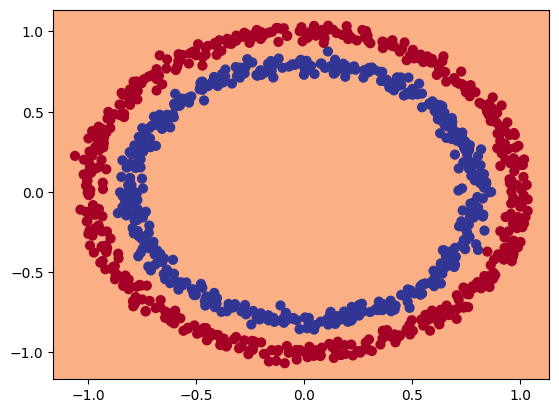

In [17]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_1,
                       X=X,
                       y=y)

In [18]:

# Let's see if our model can be used for a regression problem...

tf.random.set_seed(42)

# Creating regression data
X_regression = tf.range(0,1000, 5)
y_regression = tf.range(100, 1100, 5) # y= X + 100

# Splitting into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]

y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the regression data
model_2.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("sequential_2_1/Cast:0", shape=(None,), dtype=float32). Expected shape (None, 2), but input has incompatible shape (None,)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None,), dtype=int32)
  • training=True
  • mask=None

Encountered an error , which is pretty obvious.

**Reason** -> We compiled our `model_2` on the classification fundamentals and packages, such as BinaryCrossentropy, accuracy..

> Let's change our model to suit our regression problem

In [19]:
tf.random.set_seed(42)

# 1. Create a model
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation="relu"), # adding layer with activation function
    tf.keras.layers.Dense(10, activation="relu"), # adding layer with activation function
    tf.keras.layers.Dense(1)
])

# 2. Compile the model ( here comes the change for regression problem)
model_2.compile(loss = tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["mae"])

# 3. Fit the model
model_2.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 476.2205 - mae: 476.2205
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 444.1337 - mae: 444.1337 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 412.6842 - mae: 412.6842 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 380.7708 - mae: 380.7708 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 348.8069 - mae: 348.8069 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 314.9955 - mae: 314.9955 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 279.0215 - mae: 279.0215 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 240.5763 - mae: 240.5763  
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 199.2228 - mae: 199.2228 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 154.5063 - mae: 154.5063 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 106.5158 - mae: 106.5158 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 58.6602 - mae: 58.6602 
Epo

In [20]:
model_2.evaluate(X_reg_test, y_reg_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 59.1857 - mae: 59.1857 


[61.895294189453125, 61.895294189453125]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


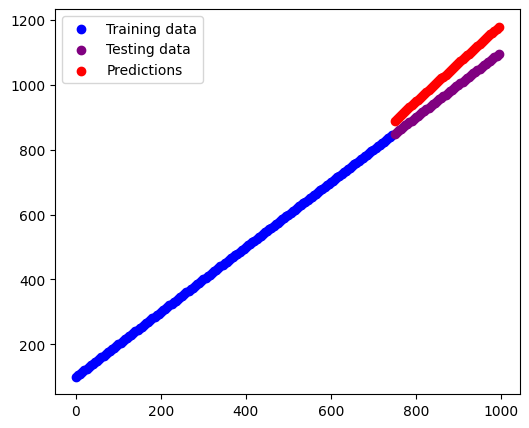

In [21]:
# Making predictions
y_reg_pred = model_2.predict(X_reg_test)
plt.figure(figsize=(6,5))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="purple", label="Testing data")
plt.scatter(X_reg_test, y_reg_pred, c="red", label="Predictions")
plt.legend()

## The missing piece : Non-linearity

In [22]:
tf.random.set_seed(42)

# 1. Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation= tf.keras.activations.linear)
])

# 2. Compile a model
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_3.fit(X, y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5010 - loss: 6.0609   
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5018 - loss: 6.0459 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5021 - loss: 6.0431 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5021 - loss: 6.0420 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5021 - loss: 6.0410 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5021 - loss: 6.0372 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5014 - loss: 6.0103 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4995 - loss: 6.0106 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4976 - loss: 5.9690
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4987 - loss: 5.9486 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4987 - loss: 5.9395 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

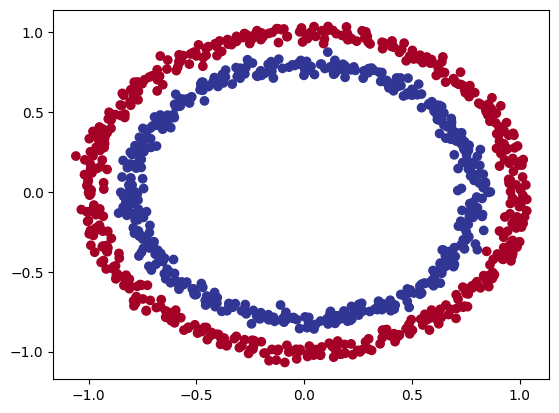

In [23]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
This is a Binary classification....


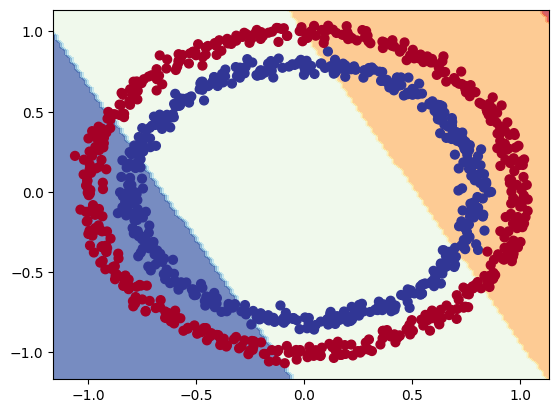

In [24]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

Let's try build our first neural network with a non-linear activation function.

In [25]:
tf.random.set_seed(42)

# 1. Create a model
model_4 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, activation= tf.keras.activations.relu)
])

# 2. Compile a model
model_4.compile(loss = tf.keras.losses.BinaryCrossentropy,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4031 - loss: 4.5831   
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4103 - loss: 4.4749
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4139 - loss: 4.4611 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4222 - loss: 4.4269 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4364 - loss: 4.3718 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4415 - loss: 4.3643 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4419 - loss: 4.3616 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4421 - loss: 4.3549 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4440 - loss: 4.3181 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4469 - loss: 4.2989 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4518 - loss: 4.2591 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
This is a Binary classification....


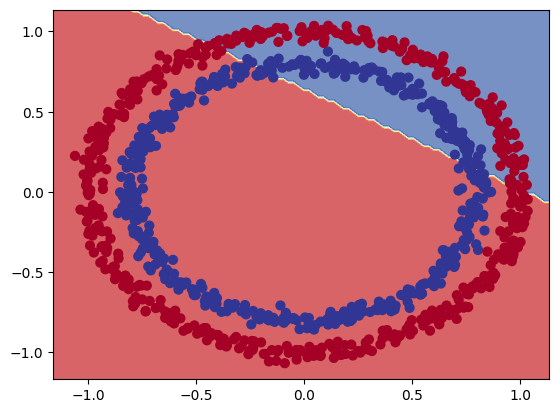

In [26]:
plot_decision_boundary(model = model,
                       X=X,
                       y=y)

In [27]:
# Time to replicate the multi-layer neural network playground from Tensorflow playground

tf.random.set_seed(42)

# 1. Create a model
model_5 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

# 2. Compile a model
model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])

# 3. Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4830 - loss: 1.5360
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4782 - loss: 1.1578 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4262 - loss: 0.9968
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3783 - loss: 0.8729
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3952 - loss: 0.8110
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3881 - loss: 0.7891
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3489 - loss: 0.7775
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3316 - loss: 0.7699
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3243 - loss: 0.7644
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3136 - loss: 0.7599
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3173 - loss: 0.7560
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy

In [28]:
# Evaluate the model
model_5.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7830 - loss: 0.5413  


[0.5333092212677002, 0.7919999957084656]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
This is a Binary classification....


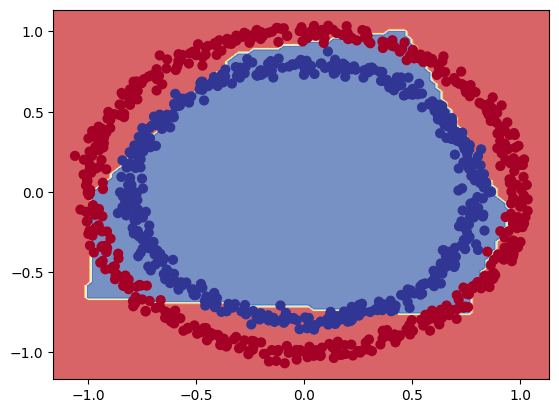

In [29]:
# How do our model predictions look
plot_decision_boundary(model_5, X, y)

Let's again try one more time to fit this yellow circle line in between the data points

In [30]:
# Setting random seed
tf.random.set_seed(42) # for reproducability

# 1. Create a model
model_6 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),  # changing activation for output layer
])

# 2. Compile the model
model_6.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5002 - loss: 0.7028
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5144 - loss: 0.6990
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5195 - loss: 0.6967
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5202 - loss: 0.6952
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5229 - loss: 0.6940
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5191 - loss: 0.6932
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5210 - loss: 0.6924
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5233 - loss: 0.6918
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5228 - loss: 0.6913
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5235 - loss: 0.6908
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5227 - loss: 0.6903
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

Woah Woah Woah!!!
we got accuracy of more than 90% , crazily awesome.

In [31]:
# Let's evaluate the model
model_6.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9521 - loss: 0.2522


[0.25275737047195435, 0.9490000009536743]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
This is a Binary classification....


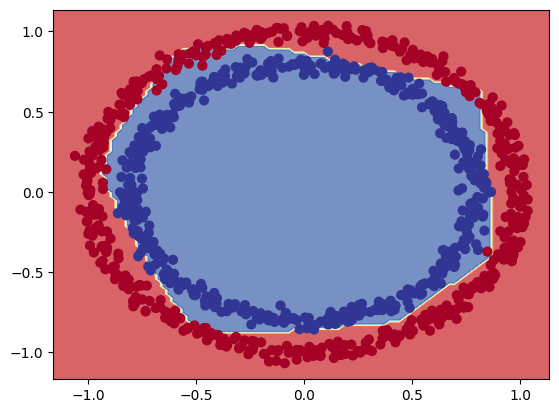

In [32]:
# Let's visualize the predictions
plot_decision_boundary(model = model_6,
                       X=X,
                       y=y)

**`Note`** - The combination of **linear (straight lines) and non-linear (non-straight lines) functions** is one of the key fundamentals pf neural networks.

Now we've discussed the concept of linear and non-linear functions (or lines), let's see them in action.

In [33]:
# Create a tensor (similar to the data we passs into our models)
tensor = tf.cast(tf.range(-10, 10), dtype=tf.float32)
tensor

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

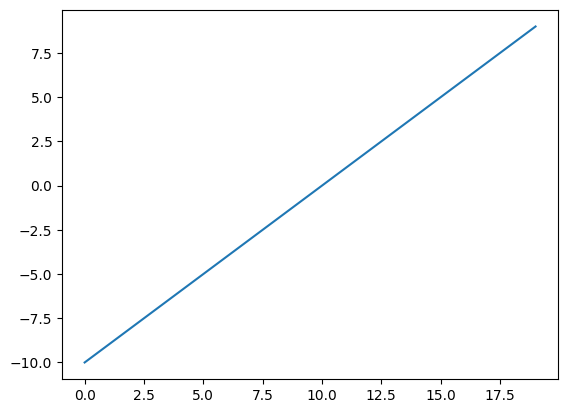

In [34]:
# Visualize our tensor
plt.plot(tensor)

In [35]:
# Let's start by replicating sigmoid
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Using signoid function on tensor
sigmoid(tensor)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

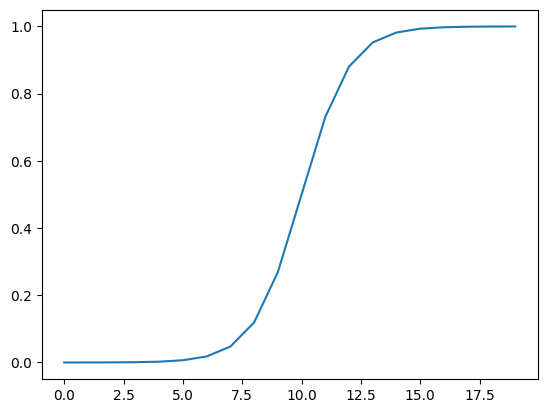

In [36]:
# Plotting sigmoid tensor
plt.plot(sigmoid(tensor))

In [37]:
# Let's recreate relu function
def relu(x):
  return tf.maximum(0, x)

# Using relu on tensor
relu(tensor)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

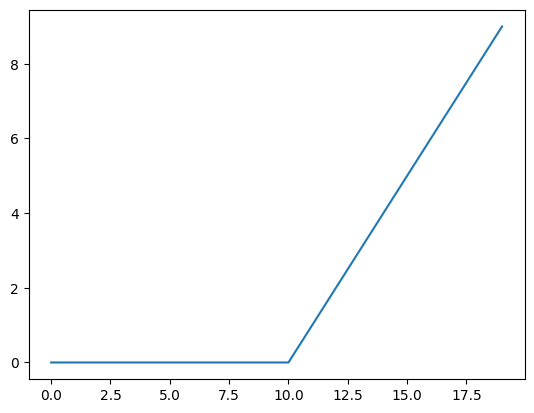

In [38]:
# Visualize tensors via relu
plt.plot(relu(tensor))

In [39]:
# Let's replicate the tanh activation function
def tanh(x):
  return (tf.exp(x) - tf.exp(-x)) / (tf.exp(x) + tf.exp(-x))

# Using tanh into our tensor
tanh(tensor)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-1.        , -1.        , -0.9999998 , -0.99999845, -0.9999877 ,
       -0.9999091 , -0.9993293 , -0.9950547 , -0.9640275 , -0.7615942 ,
        0.        ,  0.7615942 ,  0.9640275 ,  0.9950547 ,  0.9993293 ,
        0.9999091 ,  0.9999877 ,  0.99999845,  0.9999998 ,  1.        ],
      dtype=float32)>

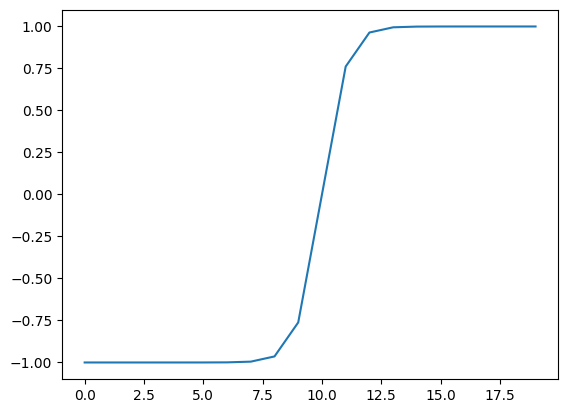

In [40]:
# Visualizing tensor
plt.plot(tanh(tensor))

## Evaluating and improving our classification model


So far we've been training and testing on the same dataset...
However, in machine learning this is basically a sin.
So let's create a training and test set.

In [41]:
X, y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [42]:
# Splitting data into training and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [43]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [46]:
# Let's recreate a model to fit on training data and evaluating on testing data
tf.random.set_seed(42)

# 1. Create a model
model_7 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

# 2. Compile the model
model_7.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# 3. Fit the data
history = model_7.fit(X_train, y_train, epochs=50)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4808 - loss: 0.6959
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5272 - loss: 0.6881
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5318 - loss: 0.6846  
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5893 - loss: 0.6788 
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5827 - loss: 0.6702 
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6195 - loss: 0.6592 
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6464 - loss: 0.6448 
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6840 - loss: 0.6264 
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6912 - loss: 0.6004 
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7433 - loss: 0.5559 
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7796 - loss: 0.5143 
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0

In [47]:
# Evaluate the model
model_7.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9746 - loss: 0.0734  


[0.07001010328531265, 0.9800000190734863]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
This is a Binary classification....
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
This is a Binary classification....


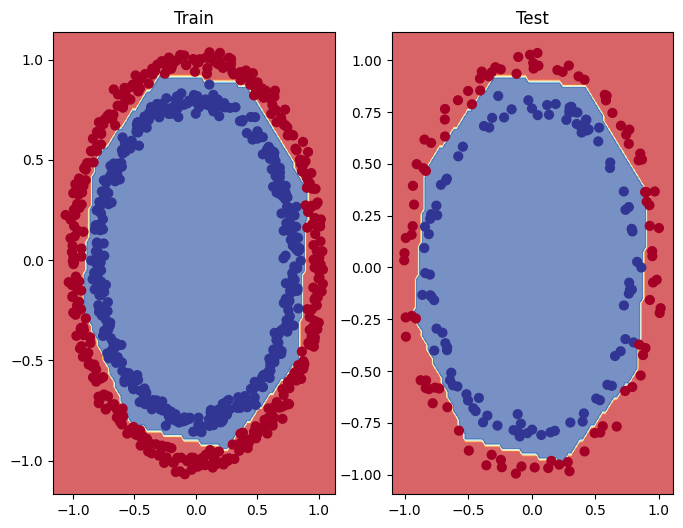

In [48]:
# Plot the decision boundaries for training and test sets
plt.figure(figsize=(8,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_7, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_7, X= X_test, y=y_test)
plt.show()

In [49]:
history.history

{'accuracy': [0.4987500011920929,
  0.5212500095367432,
  0.5262500047683716,
  0.5637500286102295,
  0.581250011920929,
  0.6075000166893005,
  0.6474999785423279,
  0.6875,
  0.6887500286102295,
  0.7487499713897705,
  0.7862499952316284,
  0.8237500190734863,
  0.8387500047683716,
  0.8550000190734863,
  0.8774999976158142,
  0.8849999904632568,
  0.8924999833106995,
  0.8949999809265137,
  0.9262499809265137,
  0.987500011920929,
  0.9887499809265137,
  0.9925000071525574,
  0.9937499761581421,
  0.9925000071525574,
  0.9937499761581421,
  0.9925000071525574,
  0.9925000071525574,
  0.9937499761581421,
  0.9950000047683716,
  0.9950000047683716,
  0.9950000047683716,
  0.9962499737739563,
  0.9975000023841858,
  0.9975000023841858,
  0.9975000023841858,
  0.9975000023841858,
  0.9975000023841858,
  0.9975000023841858,
  0.9975000023841858,
  0.9975000023841858,
  0.9975000023841858,
  0.9975000023841858,
  0.9975000023841858,
  0.9975000023841858,
  0.9975000023841858,
  0.99750000

In [50]:
pd.DataFrame(history.history)

,accuracy,loss
0,0.49875,0.695173
1,0.52125,0.689778
2,0.52625,0.686243
3,0.56375,0.680857
4,0.58125,0.672822
5,0.60750,0.662252
6,0.64750,0.648457
7,0.68750,0.629433
8,0.68875,0.600646
9,0.74875,0.559821


Text(0.5, 1.0, 'Model_7 loss curves')

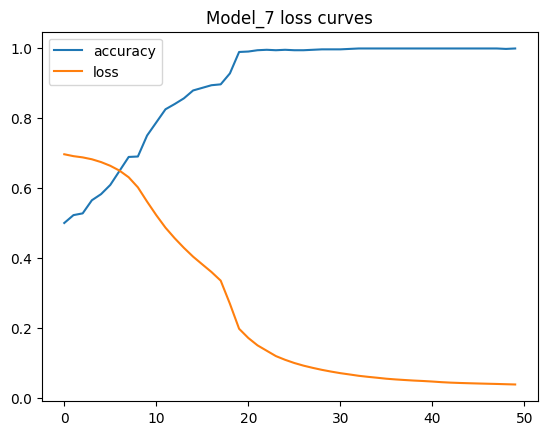

In [51]:
## Plot the loss (or training) curves
pd.DataFrame(history.history).plot()
plt.title("Model_7 loss curves")

**NOTE:** For many problems, the loss funciton going down means the model is improving (the predictions it's making are getting closer to the ground turth labels).

## Finding the best learning rate


TO find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:

* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to yout *while* its training.
* Another model (we could use the same one as above).
* A modified loss curve plot.

In [53]:
# setting random seed
tf.random.set_seed(42)

# 1. Create a model
model_8 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

# 2. Compile the model
model_8.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model (passing lr_scheduler callback)
history_8 = model_8.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5100 - loss: 0.7019 - learning_rate: 1.0000e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5040 - loss: 0.7017 - learning_rate: 1.1220e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5025 - loss: 0.7015 - learning_rate: 1.2589e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5011 - loss: 0.7013 - learning_rate: 1.4125e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5029 - loss: 0.7010 - learning_rate: 1.5849e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4988 - loss: 0.7008 - learning_rate: 1.7783e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5016 - loss: 0.7005 - learning_rate: 1.9953e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5016 - loss: 0.7002 - learning_rate: 2.2387e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5052 - loss: 0.6999 - learning_

Text(0.5, 0, 'epochs')

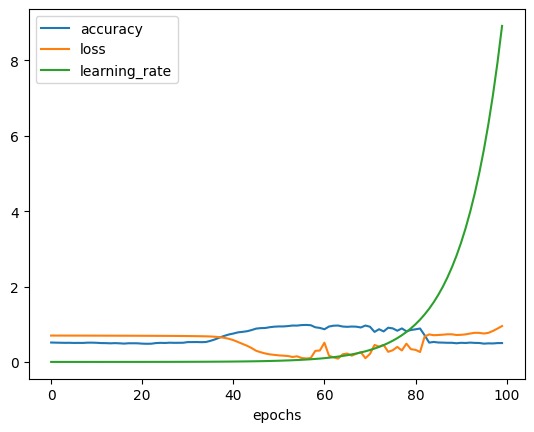

In [55]:
# Check out the histroy
pd.DataFrame(history_8.history).plot()
plt.xlabel("epochs")

Text(0.5, 1.0, 'Learning rate v/s Loss')

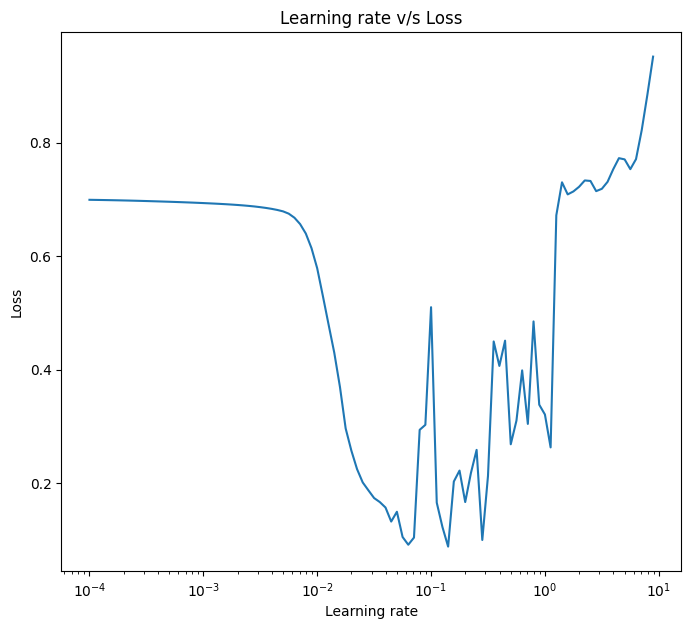

In [59]:
# Let's plot learning rate values versues the loss
lrs = 1e-4 * (10**(tf.range(100)/20))
plt.figure(figsize=(8,7))
plt.semilogx(lrs, history_8.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate v/s Loss")

In [60]:
# Example of other typical learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)